In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import font_manager, rc, cm                
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import folium
import json
from folium import plugins
print(folium.__version__)

font_path = './font/GmarketSansTTFMedium.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


0.12.1.post1


In [67]:
# 데이터 불러오기

df = pd.read_excel('./data/통합파일_최종.xlsx', index_col=1)
df.drop(['지 역','Unnamed: 12'], axis=1, inplace=True)
df

,지역코드,사고건수(건),다세대주택,아파트,다가구주택,단독주택,연립주택,매매가(만원),전세가(만원),전세가율(%)
SIG_KOR_NM,,,,,,,,,,
종로구,11110,2,684,551,32,223,265,42535.714286,29959.016393,0.704326
중구,11140,2,331,331,36,365,80,34404.347826,26146.041667,0.759963
용산구,11170,5,1155,1359,160,450,199,71464.556962,25816.400000,0.361248
성동구,11200,4,496,1683,102,266,66,49417.142857,23135.166667,0.468161
광진구,11215,9,2167,821,223,366,236,37292.357798,25912.493750,0.694847
...,...,...,...,...,...,...,...,...,...,...
화성시,41590,19,1236,12218,244,973,295,13223.157895,14630.000000,1.106392
광주시,41610,8,4967,3165,102,794,324,20141.652893,19568.818681,0.971560
양주시,41630,1,612,3608,26,345,130,12406.521739,11783.333333,0.949769


In [75]:
# Min-Max 정규화

data = df[['매매가(만원)', '전세가(만원)','전세가율(%)']]

scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

data_scale = pd.DataFrame(data_scale)

C:\Users\User\anaconda3\envs\pydatavenv\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

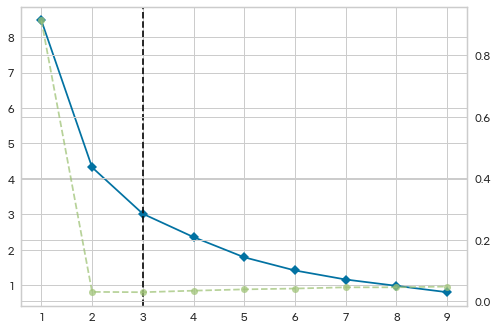

In [76]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scale)

In [57]:
k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(data_scale)
print(df.head())

             지역코드  전세보증반환보증 사고건수(건)  다세대주택   아파트  다가구주택  단독주택  연립주택  \
SIG_KOR_NM                                                            
종로구         11110                 2    684   551     32   223   265   
중구          11140                 2    331   331     36   365    80   
용산구         11170                 5   1155  1359    160   450   199   
성동구         11200                 4    496  1683    102   266    66   
광진구         11215                 9   2167   821    223   366   236   

                     매매가           전세가      전세가율  cluster  
SIG_KOR_NM                                                 
종로구         42535.714286  29959.016393  0.704326        1  
중구          34404.347826  26146.041667  0.759963        1  
용산구         71464.556962  25816.400000  0.361248        2  
성동구         49417.142857  23135.166667  0.468161        1  
광진구         37292.357798  25912.493750  0.694847        1  


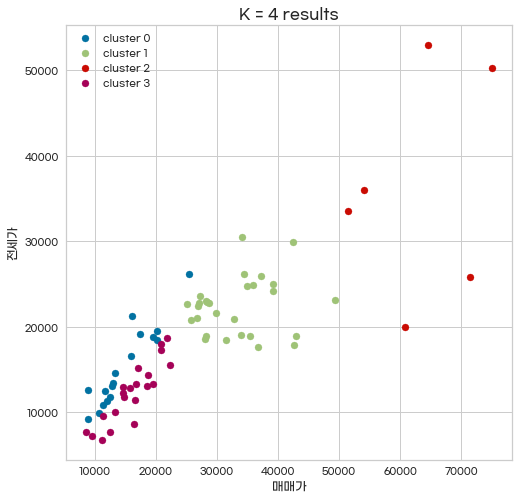

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, '매매가'], df.loc[df['cluster'] == i, '전세가'], 
                label = 'cluster ' + str(i))
    
plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('매매가', size = 12)
plt.ylabel('전세가', size = 12)
plt.show()

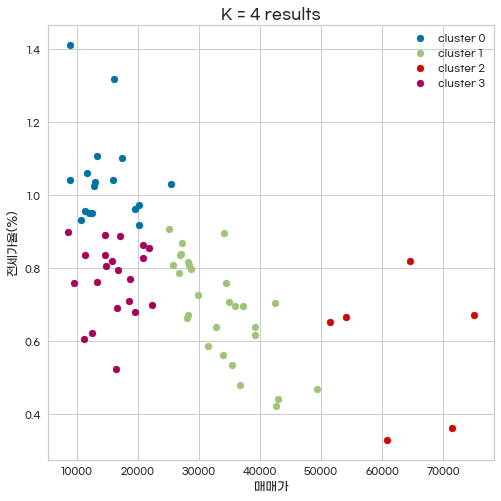

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, '매매가'], df.loc[df['cluster'] == i, '전세가율'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('매매가', size = 12)
plt.ylabel('전세가율(%)', size = 12)
plt.show()

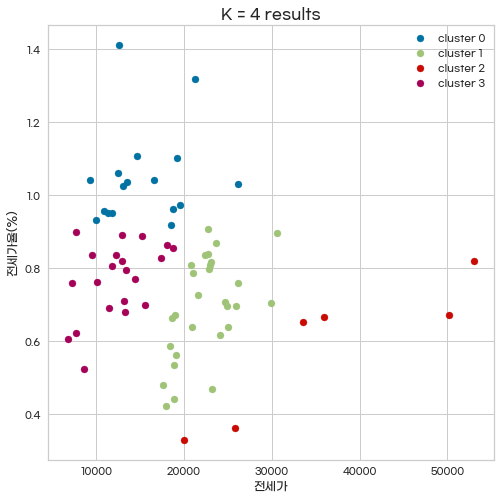

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, '전세가'], df.loc[df['cluster'] == i, '전세가율'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('전세가', size = 12)
plt.ylabel('전세가율(%)', size = 12)
plt.show()

In [61]:
# 군집분석 지도 시각화

state_geo = 'data/전국_군집분석용.json'
state_geo2 = json.load(open(state_geo, encoding ="utf-8"))

In [62]:
m = folium.Map(location = [37.5760, 126.9769], tiles="OpenStreetMap", zoom_start=9)

choropleth = folium.Choropleth(
    geo_data=state_geo2,
    name = "지도",
    data = df,
    columns=(df.index, "cluster"),
    fill_color='Spectral',
    key_on="feature.properties.SIG_KOR_NM",
    fill_opactiy = 1,
    line_opacity = 0.5,
    nan_fill_color='#FAEB78',
    nan_fill_opacity=0,
).add_to(m)

In [63]:
m


In [131]:
df.to_csv('./data/통합파일_군집.csv')